##### Algorithms and Data Structures (Winter - Spring 2022)

* [Colab view](https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_intro_2.ipynb)
* [nbviewer view](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_intro_2.ipynb)
* [ADS Page 1](ADS_intro_1.ipynb)
* [ADS Project](ADS_project_1.ipynb)
* [Repo](https://github.com/4dsolutions/elite_school/)

# Choosing Algorithms

You know from your own experience that some ways of accomplishing a task may take a lot longer than others.  Going more slowly may have its advantages, as in real life we're accomplishing multiple tasks and have to weigh trade-offs.

For example, you could wolf your dinner in a hurry, and if the only objective were to eat and run, this could be appropriate.  However dinner may be an important social occasion and eating quickly and leaving the table only deprives one of catching up on important developments.

A first question, when faced with a computing challenge, is whether there's a solution at all.  The second question is whether this solution is at all practical in terms of time and resources.  A third question is how much original work will be required on your part, and how long might that take.

The first question involves research and not reinventing the wheel.  If people stopped to reinvent every algorithm from scratch, we would move forward much too slowly.  Everyone would need the same insights and genius as everyone else we we know the world is not like that.

On the other hand, simply grabbing a published algorithm from a book without having much insight into how the algorithm actually works, or why, may lead to troubles down the road.  

Not really understanding how an algorithm works should not prevent you from using it though.  In computing, we learn to treat some elements of our system as "black boxes" meaning we have no insight into the internals, but may use them anyway.

The second question (how long?) involves understanding what's called "Big O notation" which looks something like $O(n^{2})$ or $O(n\ log(n))$.  Big O notation is about roughly how long an algorithm will likely take to find a solution, and is pegged to some input "n" of growing dimension.  

For example, n might be the number of digits in a number, and you want to know if the number is prime, or its prime factors.  Many off-the-self algorithms address these very questions.

In [41]:
from primes import isprime, factors

isprime(23321)

True

In [2]:
factors(4839274)  # this version includes 1 as a factor...

(1, 2, 11, 11, 19997)

In [3]:
factors(12)  # but not the number itself

(1, 2, 2, 3)

In [4]:
factors(11 * 11 * 13 * 13 * 7)

(1, 7, 11, 11, 13, 13)

In [5]:
# what factors returns should multiply together giving
# the original number
from functools import reduce
from operator import mul

f = factors(360)  # list of factors
reduce(mul, f)    # multiply all fs together

360

Or n is the number of points floating in XYZ space and you wish to generate the biggest convex polyhedron that could contain all of them, either as corners, or internally.  An open source program named Qhull will do this for you.

If a measure of the algorithm's efficiency is something like $O(n!)$, that means the time needed grows very quickly as n gets bigger. Often times we say an algorithm takes "polynomial time" and usually that means the algorithm is impractical for large values of n.  But how large is too large?

If the efficency is more like $O(n)$, we say the time increases "linearly with n" which is about as good as it gets. 

For example the amount of time it takes to scan a list for a specific value tends to increase linearly with the length of the list.  A list 10 times longer, takes an average of 10 times longer to search.

# Inventing Algorithms

Sometimes you might find exactly the algorithm you need, including in the computer language of your choice.  You may need to customize it a little, to fit into your larger project, but that's a minor detail.

Other times, you may need to invent your own algorithms.  You might want to do this anyway, because you see a clear way to accomplish a task and feel relying on others might take more time.  You might elect to devise your own solution for many reasons, including because you're in school learning how to write algorithms.

One technique involved in writing your own solution is writing tests for that solution.  

How will you know your solution is correct?  This requires having an independent and trusted source of "right answers" such as the digits of pi (if you're trying to generate them) or a list of consecutive prime numbers (if you're trying to generate primes).

Speaking of generating prime numbers, the Sieve of Eratosthenes is a great example of an ancient algorithm, passed down through the ages.  See Notes.

In [6]:
from primes import eratosthenes
print(eratosthenes(100))  # all primes <= 100

Eliminating multiples of: 2
Eliminating multiples of: 3
Eliminating multiples of: 5
Eliminating multiples of: 7
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


For example, in the case of [our Wordle-like project](ADS_project_1.ipynb), evaluating a guess versus a right answer, coming up with the correct feedback, is something one can do manually, without a computer, once the rules of the game are understood.  If your algorithm matches all the results you know are correct, having derived them yourself, then that's evidence you're making progress.

# Proving Algorithms

More valuable than tests, or at least complementary to tests, would be some kind of mathematical proof that the algorithm is in fact correct.  

Some algorithms may produce "false positives" or "false negatives".  For example, the Fermat Primality test may falsely flag a composite as prime, but it will never falsely flag a prime as composite.

In [7]:
from math import gcd

def fermat(n, a=3):
    if gcd(n, a) > 1: # n is composite
        return False
    if pow(a, n-1, n) == 1:
        return True  # fermat test
    else:
        return False

In [8]:
fermat(17)

True

In [9]:
fermat(109)

True

In [10]:
fermat(1729)

True

In [11]:
factors(1729)

(1, 7, 13, 19)

Along with proving and testing comes assessing the algorithm's efficiency. As the inventor of the algorithm, it's up to you to get a sense of what its Big-O signature might be.  

If you plan to publish your algorithm as a useful invention available to a wider public, such an analysis may be expected of you.

A lot of deep computer science has gone into figuring out how to prove whether a program is correct.  In practice, one often can provide a proof, to everyone's satisfaction. However in theory, there's no guaranteed strategy for proving a program is bullet proof.  

At this general a level we're talking about the fabric of logic itself, and logicians had already come to similar conclusions, about the generic incompleteness of proof-based systems, even before computer scientists raised the issue of provability.

# One of the Oldest Algorithms

One of the oldest algorithms that's been passed down through the ages is known as Euclid's Algorithm.  Whether Euclid invented it is not the key question.  The method was included among Euclid's published techniques.

The purpose of Euclid's Algorithm (EA) is to find the biggest number that will divide two other numbers.  We're talking about positive integers and a unit, such that if EA(a, b) is 1, then a/b is already a fraction in lowest terms.

For example, EA(24, 16) is 8, because 8 is the largest integer, the greatest common divisor, of both 24 and 16.  2 is also a divisor, but isn't the greatest.  If you came across the fraction 16/24, you would know you might reduce it to 2/3, and at that point, there's no further reduction possible.  gcd(2, 3) = 1.  When the numerator and denominator are relatively prime (e.g. 14/23), have no factors in common, then we say it's in "lowest terms".

When computing the gcd of a pair of numbers, sometimes one of the numbers is already a divisor of the other, in which case that's the answer.  The gcd of 10 and 5 is simply 5.

The implementation of a "greatest common divisor" solution below is *not* Euclid's Method, but a relatively inefficent method that is nevertheless not hard to understand.

Get all the divisors of input numbers j and k, then get the greatest divisor they both have in common.

In [12]:
def divisors(n : int):
    divs = list()
    for d in range(1, n + 1):
        if n % d == 0:
            divs.append(d)
    return divs        

In [13]:
divisors(12)

[1, 2, 3, 4, 6, 12]

In [14]:
divisors(36)

[1, 2, 3, 4, 6, 9, 12, 18, 36]

In [15]:
def gcd(a, b):
    return max(set(divisors(a)).intersection(set(divisors(b))))

In [16]:
gcd(24, 10)

2

In [17]:
gcd(19, 21)

1

In [18]:
gcd(10045, 4095)

35

This works!

However, Euclid's Method (another name for Euclid's Algorithm) is much cleverer.  

Consider our two inputs to be m and n.  If the smaller m divides the larger n with no remainder, we're done: m is the greatest divisor.  

It could be that m is down to 1 at this point (see below), in which case the original n and m were "strangers" to one another, meaning their only factor in common was the number 1.  We could also say they were "relatively prime".

In [19]:
from math import gcd

gcd(19, 101)  # both prime

1

In [20]:
gcd(18, 13) # relatively prime (strangers)

1

Otherwise, if m is not 1, and there's some remainder r after dividing n by m, then the next step is to find the greatest divisor of m and r.  Whatever divides both will also divide n, the longer starting length.  

And so on, we keep going.  The n, m pair keeps getting smaller as we keep taking the  remainder from the previous pair.  Down to m = 1 at the limit, but we don't necessarily get to that.  Whenever m divides n, we're done.

Here's a first attempt at implementing the above:

In [21]:
def EA(m, n):
    if m > n:
        m, n = n, m  # make m the smaller
    while True:
        q = n // m     #  get quotient
        if q * m == n: #  if no remainder, done
            return m
        n, m = m, n - q*m # m, r -- the new terms

In [22]:
EA(12, 100)

4

In [23]:
EA(10045, 4095)

35

In [24]:
%timeit  gcd(4839274, 639232)

351 ns ± 64.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [25]:
%timeit  EA(4839274, 639232)

3.35 µs ± 68.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


EA is hugely more efficient compared to the all-divisors based algorithm, taking only micro-seconds versus milliseconds.  

EA does not require finding all the divisors of any number.  EA eventually comes to an end, with an answer if 1, so there's no danger the ```while True``` loop will be infinite.

Speaking of loops, here's another implementation of EA employing recursion:

In [26]:
def EA(m, n):
    if m > n:
        m, n = n, m  # make m the smaller
    r = n % m        # remainder
    if r == 0: #  if no remainder, done
        return m
    return EA(m, r)

In [27]:
%timeit  EA(4839274, 639232)

3.85 µs ± 64.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The pithiest (most Pythonic) implementation of EA is attributed to Guido van Rossum, Python's inventor.  

Here it is:

In [28]:
def EA(m, n):
    while m:
        n, m = m, n % m
    return n

In [29]:
EA(12, 100)

4

In [30]:
%timeit  EA(4839274, 639232)

1.42 µs ± 51 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Notes:


Here's the source code for the Seive of Eratosthenes (with more comments), from primes.primesplay.py -- a module within the primes subfolder.

```python

def eratosthenes(n):
    # root2 is renamed math.sqrt
    the_max = floor(root2(n))    
    # start with all consecutive ints up to n
    sieve = list(range(0, n+1))  
    eliminator = 2
    while True:
        if eliminator > the_max: # no more to eliminate
            break
        print("Eliminating multiples of:", eliminator)
        # turn any multiples of eliminator to 0
        for k in range(2 * eliminator, n + 1, eliminator): 
            sieve[k] = 0  
        # scan for next uneliminated int
        while sieve[eliminator + 1] == 0:  
            eliminator += 1
        else:
            eliminator = sieve[eliminator + 1]
        
    # shrink me down (compact the sieve) with
    # a list comprehension
    sieve = [n for n in sieve if n != 0][1:]
    return sieve
```

The code below is for isprime() and factors():

```python

def isprime(n):
    """
    isprime(n: int) -> bool

    Expects positive int, returns Boolean

    _cache is for internal cache of primes seen so far
    """
    isprime._cache = set((2,))
    if n in isprime._cache:     # see if on file already, screens 2
        return True
    if (0 == n%2) or (n == 1):  # if not two and yet even, or 1...
        return False            # n is not prime
    # check range of odds from 3 up
    for i in range(3, floor(root2(n)) + 1, 2):
        if n % i == 0:       # no remainder?
            return False     # ...then composite
    isprime._cache.add(n)            # add to _stash
    return True              # made it through the screening

def factors(n):
    """
    factors(n: int) -> tuple

    Expects int, prime or composite
    returns a tuple with all prime factors, also 1, and -1 if negative
    """
    if not isinstance(n, int):  # gotta be int
        raise ValueError
    if n == 0:
        return (0,)
    found = [1]   # always
    if n < 0:
        found.append(-1)
        n = abs(n)
    # chop n down by successive prime factors
    divisor = 2
    while True:
        if n == 1:
            break # we're done
        if isprime(n):
            found.append(n)
            break # we're done
        while n % divisor == 0 and isprime(divisor):
            # divides by same divisor as many times as it takes
            found.append(divisor)
            n //= divisor  # chop it down
        if divisor == 2:   # even once
            divisor = 3
        else:
            divisor = max(divisor, max(found)) + 2 # always odd

    return tuple(found) # make it immutable

```

# Cumulative Sequences

Suppose you have a sequence since as the Fibonacci numbers, and for some reason want a cumulative total of all the numbers in a sequence up to a specific term.  In fact, you would like a cumulative total to go with every term in the original sequence.

Like this:

In [31]:
# Fibonacci Numbers
# https://oeis.org/A000045

def fibo(a=0, b=1):
    while True:
        yield a
        b, a = a + b, b
        
gen = fibo()
fibs = [next(gen) for _ in range(10)]
print(fibs)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [36]:
def accumulate(seq):
    totals = []
    term = 0
    for i in seq:
        term += i
        totals.append(term)
    return totals

In [37]:
accumulate(fibs)

[0, 1, 2, 4, 7, 12, 20, 33, 54, 88]

Interestingly, the [running total of Fibonacci numbers](https://oeis.org/A000071) matches itself, minus one from each term, starting a couple terms further forward.  

Imagine subtracting 1 from each of these terms:

In [39]:
fibs[2:]

[1, 2, 3, 5, 8, 13, 21, 34]

Now let's do it:

In [38]:
[fib-1 for fib in fibs[2:]]

[0, 1, 2, 4, 7, 12, 20, 33]

## Exercise

Write a function that takes a sequence and returns a sequence, of differences between successive terms.

For example, ```[0, 1, 2, 4, 7, 12, 20, 33]``` would output ```[1, 1, 2, 3, 5, 8, 13]```.  The resulting sequence will have one less term than the input sequence.

# Resources

[*Learning Math with Python*](https://doingmathwithpython.github.io/pycon-us-2016/#/3) (slide show on Github) by the author of a book by that title, Amit Saha.

[*Math Adventures with Python*](https://www.amazon.com/Math-Adventures-Python-Illustrated-Exploring-ebook/dp/B074653Z4D/ref=sr_1_3?crid=1IT4OKGBJVTOZ&keywords=math+adventures+with+python&qid=1643748496&s=books&sprefix=math+adventures+with+python%2Cstripbooks%2C307&sr=1-3) by Peter Farrell, depicted below (on the left):

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/32643128658/in/photostream/" title="Peter and Steve"><img src="https://live.staticflickr.com/7895/32643128658_0d55c9abf9.jpg" width="500" height="500" alt="Peter and Steve"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Lots of Python in this MIT course:

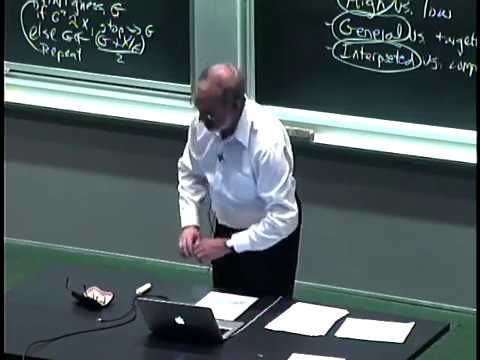

In [40]:
from IPython.display import YouTubeVideo
YouTubeVideo("k6U-i4gXkLM")